In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf
import pandas as pd

tickers = ['INFY.BO'] 

data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start='2013-07-11', end='2024-06-10')
    stock_data['Ticker'] = ticker 
    data[ticker] = stock_data

df = pd.concat(data.values())
df.reset_index(inplace=True)
df.tail()



[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
2660,2024-06-03,1435.150024,1439.050049,1404.000000,1405.900024,1405.900024,182274,INFY.BO
2661,2024-06-04,1411.949951,1412.949951,1359.099976,1394.400024,1394.400024,1016378,INFY.BO
2662,2024-06-05,1400.000000,1438.000000,1400.000000,1430.250000,1430.250000,505138,INFY.BO
2663,2024-06-06,1442.550049,1474.000000,1437.400024,1472.500000,1472.500000,712430,INFY.BO
2664,2024-06-07,1475.150024,1539.000000,1475.150024,1533.349976,1533.349976,2034394,INFY.BO


In [4]:
df = df.drop(['Date','Adj Close','Volume','Ticker'],axis=1)

In [5]:
df.head()

,Open,High,Low,Close
0,316.287506,320.431244,313.287506,315.843750
1,347.424988,363.125000,343.625000,350.343750
2,348.912506,348.912506,341.131256,342.731262
3,337.512512,346.118744,336.250000,341.306244
4,341.306244,344.362488,341.306244,343.787506


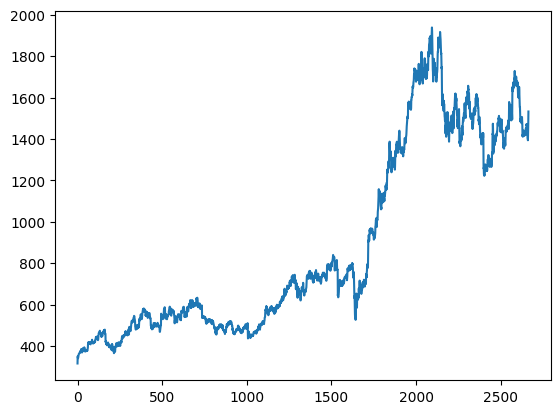

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

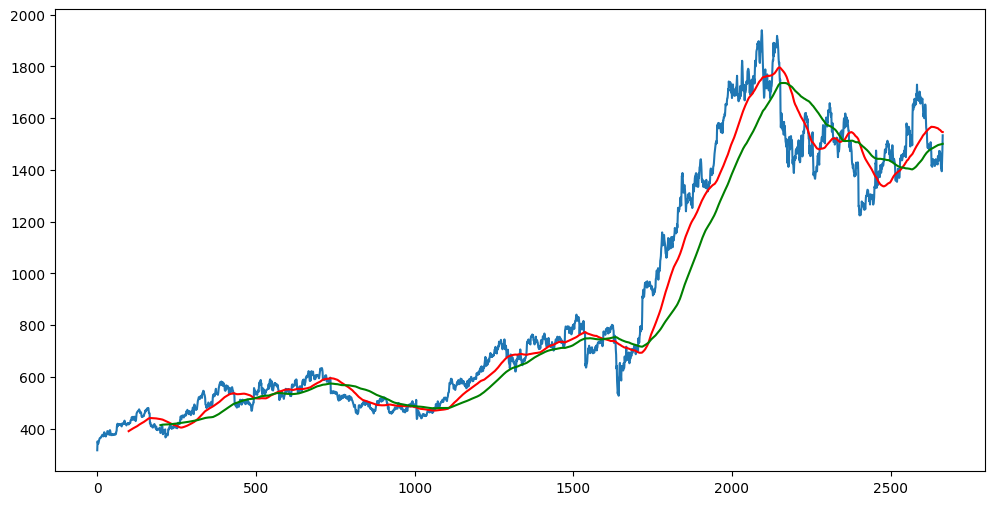

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [9]:
df.shape

(2665, 4)

In [10]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [11]:
data_training.shape

(1865, 1)

In [12]:
data_testing.shape

(800, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
train_scaled = scaler.fit_transform(data_training)
test_scaled = scaler.fit_transform(data_testing)

In [15]:
train_scaled

array([[0.        ],
       [0.03218715],
       [0.025085  ],
       ...,
       [0.92284417],
       [0.9145408 ],
       [0.91071568]])

In [16]:
train_scaled.shape

(1865, 1)

In [17]:
X_train = []
y_train = []
for i in range(100,train_scaled.shape[0]):
    X_train.append(train_scaled[i-100:i])
    y_train.append(train_scaled[i,0])

x_train , y_train  = np.array(X_train),np.array(y_train)

In [18]:
x_train

array([[[0.        ],
        [0.03218715],
        [0.025085  ],
        ...,
        [0.09775682],
        [0.09614162],
        [0.09327862]],

       [[0.03218715],
        [0.025085  ],
        [0.02375551],
        ...,
        [0.09614162],
        [0.09327862],
        [0.09454393]],

       [[0.025085  ],
        [0.02375551],
        [0.02607043],
        ...,
        [0.09327862],
        [0.09454393],
        [0.09837491]],

       ...,

       [[0.63927068],
        [0.64822713],
        [0.64067012],
        ...,
        [0.89924022],
        [0.8923364 ],
        [0.92223773]],

       [[0.64822713],
        [0.64067012],
        [0.6469676 ],
        ...,
        [0.8923364 ],
        [0.92223773],
        [0.92284417]],

       [[0.64067012],
        [0.6469676 ],
        [0.64500841],
        ...,
        [0.92223773],
        [0.92284417],
        [0.9145408 ]]])

In [19]:
x_train.shape

(1765, 100, 1)

In [20]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


2024-07-11 03:10:17.650889: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 03:10:17.652400: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 03:10:17.675860: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 03:10:17.675893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 03:10:17.676654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
56/56 [==============================] - 15s 219ms/step - loss: 0.0207
Epoch 2/50
56/56 [==============================] - 13s 231ms/step - loss: 0.0052
Epoch 3/50
56/56 [==============================] - 13s 229ms/step - loss: 0.0044
Epoch 4/50
56/56 [==============================] - 13s 224ms/step - loss: 0.0038
Epoch 5/50
56/56 [==============================] - 12s 215ms/step - loss: 0.0038
Epoch 6/50
56/56 [==============================] - 12s 217ms/step - loss: 0.0035
Epoch 7/50
56/56 [==============================] - 13s 226ms/step - loss: 0.0029
Epoch 8/50
56/56 [==============================] - 13s 224ms/step - loss: 0.0033
Epoch 9/50
56/56 [==============================] - 12s 221ms/step - loss: 0.0036
Epoch 10/50
56/56 [==============================] - 13s 229ms/step - loss: 0.0031
Epoch 11/50
56/56 [==============================] - 13s 233ms/step - loss: 0.0031
Epoch 12/50
56/56 [==============================] - 12s 220ms/step - loss: 0.0027
Epoch 13/50
5

In [27]:
train_scaled_df = pd.DataFrame(train_scaled, columns=data_training.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns=data_testing.columns)

In [37]:
past_100_days= data_training.tail(100)


In [44]:
past_100_days.tail(100)

,Close
1765,1009.299988
1766,1007.200012
1767,1019.650024
1768,975.349976
1769,1011.049988
...,...
1860,1272.300049
1861,1304.349976
1862,1305.000000
1863,1296.099976


In [36]:
test_scaled_df.head()

,Close
0,0.119846
1,0.119986
2,0.092593
3,0.081272
4,0.095737


In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [42]:
data_testing.head()

,Close
1865,1309.599976
1866,1309.699951
1867,1290.099976
1868,1282.000000
1869,1292.349976


In [43]:
final_df.head()

,Close
0,1009.299988
1,1007.200012
2,1019.650024
3,975.349976
4,1011.049988


In [45]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(900, 1)

In [46]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test , y_test  = np.array(x_test),np.array(y_test)

In [47]:
y_predicted = model.predict(x_test)

25/25 [==============================] - 3s 91ms/step


In [48]:
scaler.scale_

array([0.00103734])

In [49]:
scale_factor = 1/scaler.scale_[0]
y_predicted =y_predicted*scale_factor
y_test = y_test*scale_factor

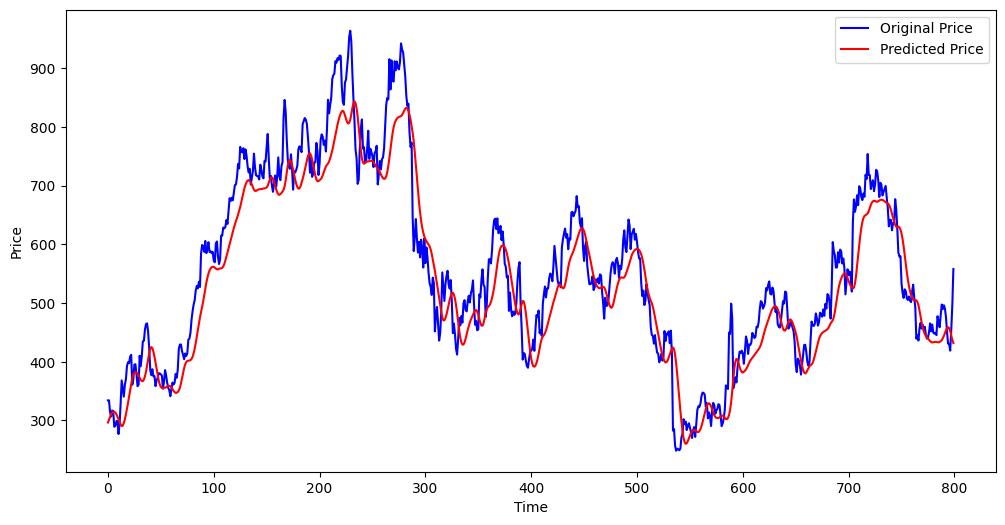

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()